<a href="https://colab.research.google.com/github/Syilun/Kaggle/blob/main/Semi_hw01_sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libaries

In [165]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


from sklearn.impute import KNNImputer


# for modeling 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM

# to avoid warnings
import warnings
warnings.filterwarnings(action='ignore')


Mount Your Gdrive to Load Dataset

In [2]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

# change directory to secom folder in google drive
%cd /content/drive/MyDrive/secom/ 
!pwd # output the current directory
!ls # check


Mounted at /content/drive
/content/drive/MyDrive/secom
/content/drive/MyDrive/secom
uci-secom.csv


Reading the Data and understanding the attributes

In [ ]:
# reading the data
data = pd.read_csv('../secom/uci-secom.csv')

# getting the shape of the data
# we have 1,567 rows and 592 columns
print(data.shape)


In [ ]:
# getting the head of the data
data.head()

In [7]:
# deleting the first column

data = data.drop(columns = ['Time'], axis = 1)

# checking the shape of the data after deleting a column
data.shape

(1567, 591)

In [ ]:
# checking if the dataset contains any NULL values
# we do have NaN values if we see the output above

data.isnull().any().any()

In [97]:
# Drop columns with more than 25% missing values
missing_value_columns = data.columns[data.isna().mean() >= 0.25]
# print(missing_value_columns)
df = data.drop(missing_value_columns, axis=1)

In [99]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# Absence of a signal is assumed to be no signal in the dataset
# so better we not take median or mean and replace them with zeros

# https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/
# https://scikit-learn.org/stable/modules/impute.html#impute


imputer = KNNImputer(missing_values=np.nan)
df = pd.DataFrame(imputer.fit_transform(df))
# again, checking if there is any NULL values left
df.isnull().any().any()

False

In [ ]:
df.head()

In [ ]:
# len(df.index)

In [ ]:
data.info()
df.info()

In [104]:
# data.info()
# df.info()

df.rename(columns = {558:'Pass/Fail'}, inplace = True)
df = df.astype({"Pass/Fail": int})
# df.info()

In [107]:
unique_vals = df['Pass/Fail'].unique()
# print(unique_vals)  # [-1, 1]

In [108]:
# 遞迴[-1, 1] 用來產生一個先是Pass，後來Fail 的2 elements(df) 的list
targets = [df.loc[data['Pass/Fail'] == val] for val in unique_vals]
print(targets)

[            0        1          2  ...      556       557  Pass/Fail
0     3030.93  2564.00  2187.7333  ...  0.00438   65.5742         -1
1     3095.78  2465.14  2230.4222  ...  0.00600  208.2045         -1
3     2988.72  2479.90  2199.0333  ...  0.00440   73.8432         -1
4     3032.24  2502.87  2233.3667  ...  0.00440   73.8432         -1
5     2946.25  2432.84  2233.3667  ...  0.00520   44.0077         -1
...       ...      ...        ...  ...      ...       ...        ...
1562  2899.41  2464.36  2179.7333  ...  0.00470  203.1720         -1
1563  3052.31  2522.55  2198.5667  ...  0.00470  203.1720         -1
1564  2978.81  2379.78  2206.3000  ...  0.00250   43.5231         -1
1565  2894.92  2532.01  2177.0333  ...  0.00750   93.4941         -1
1566  2944.92  2450.76  2195.4444  ...  0.00450  137.7844         -1

[1463 rows x 559 columns],             0        1          2  ...     556       557  Pass/Fail
2     2932.61  2559.94  2186.4111  ...  0.0148   82.8602          1
10    2

In [ ]:
# print(targets[0][1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

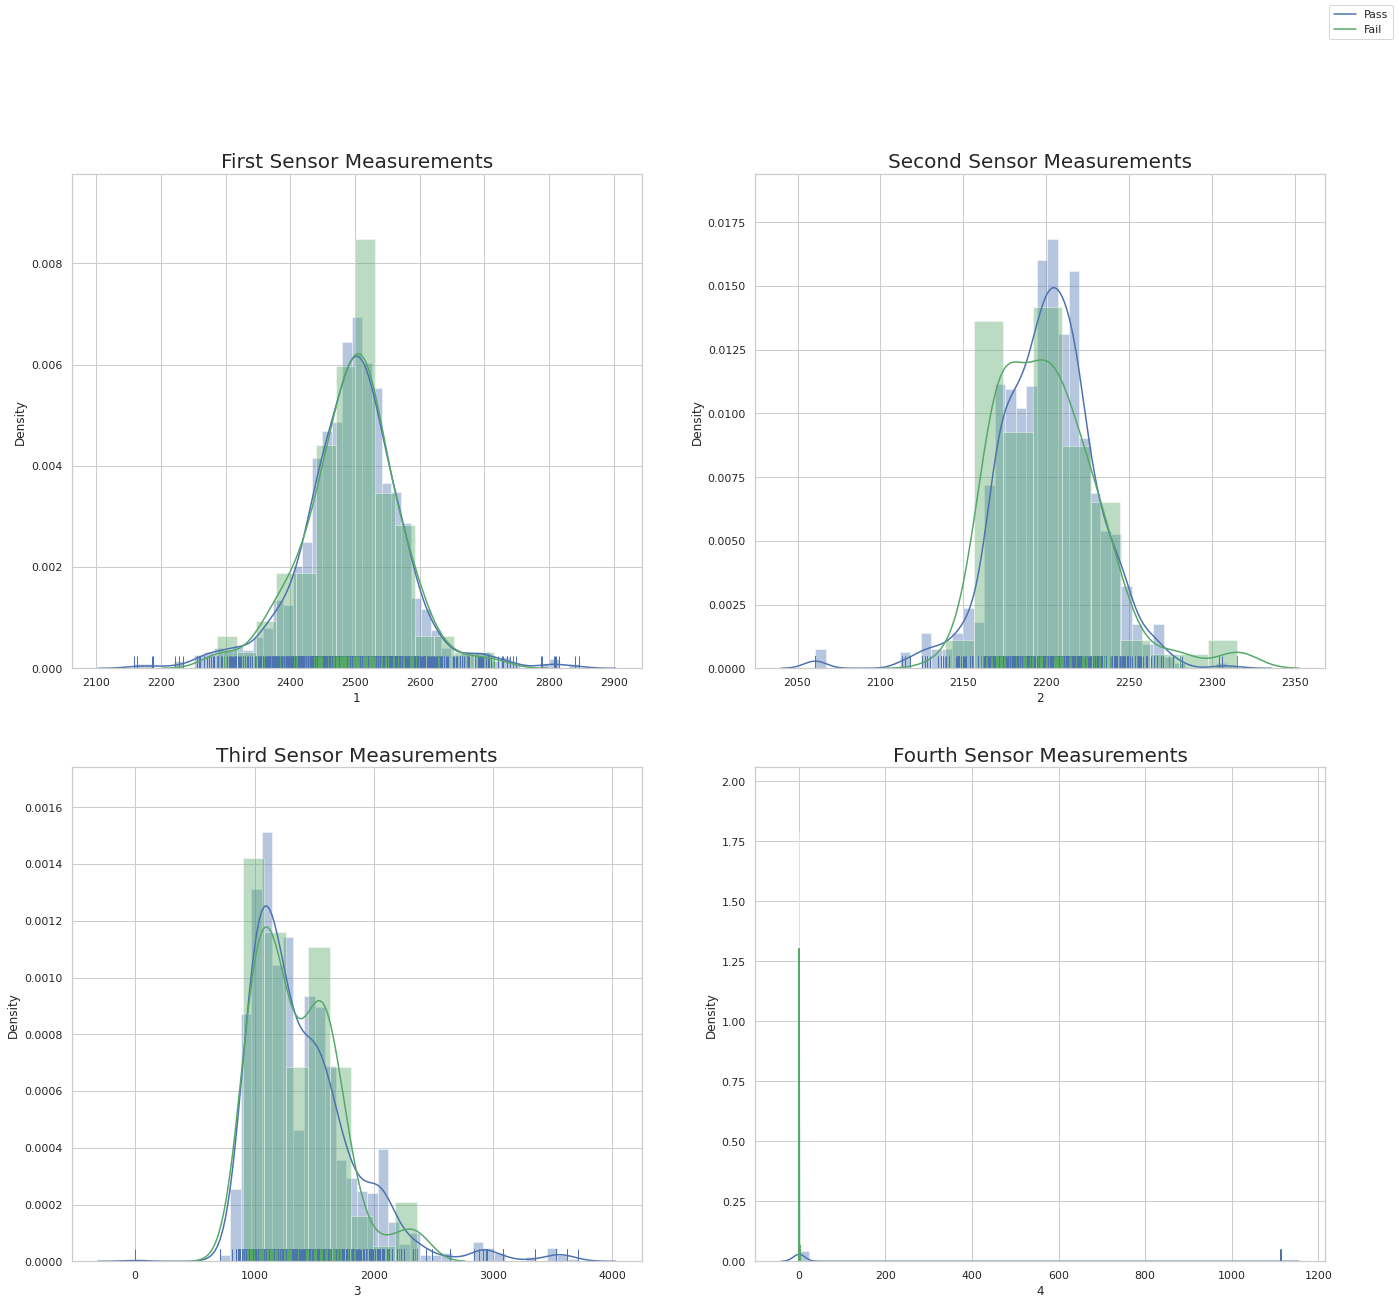

In [109]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target[1], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target[2], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target[3], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target[4], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()


In [ ]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

labels = ['Pass', 'Fail']
size = df['Pass/Fail'].value_counts()
colors = ['orange', 'red']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()



data['Pass/Fail'].value_counts().plot(kind="bar")

In [117]:
# $ Check 有116個sensors 值維持不變
(pd.Series({column: len(X[column].unique()) for column in X.columns}) == 1).sum()

116

In [ ]:
temp = (pd.Series({column: len(X[column].unique()) for column in X.columns}) == 1)
single_value_columns = temp[temp].index
single_value_columns = list(single_value_columns)
df.drop(single_value_columns, axis=1, inplace=True)

In [132]:
df.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,...,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,257.1676,0.66458,7.904,0.12854,3.10880,0.05208,3.06038,19.21168,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,...,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,258.0696,0.75868,8.084,0.17064,3.20866,0.06392,3.14666,22.65672,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,...,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.0640,0.90320,1.100,0.62190,0.41220,0.25620,0.41190,68.84890,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,1.279,...,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.2280,0.65110,7.320,0.16300,3.56110,0.06700,2.72900,25.03630,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,2.209,...,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,258.6240,0.72078,9.928,0.19926,3.94380,0.07914,3.84254,27.36838,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432,-1


In [136]:
# Split df into X and y
y = df['Pass/Fail']
X = df.drop('Pass/Fail', axis=1)

In [137]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
X_train

In [140]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


In [144]:
y_train.value_counts()

-1    1024
 1      72
Name: Pass/Fail, dtype: int64

In [146]:
import plotly.express as px
fig = px.pie(
    y_train.value_counts(),
    values='Pass/Fail',
    names=["PASS", "FAIL"],
    title="Class Distribution",
    width=500
)

fig.show()

In [ ]:
data.corr()

In [162]:
def evaluate_model(model, X_test, y_test):
    
    acc = model.score(X_test, y_test)
    print("Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])
    clr = classification_report(y_test, y_pred, labels=[-1, 1])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=[0.5, 1.5], labels=["PASS", "FAIL"])
    plt.yticks(ticks=[0.5, 1.5], labels=["PASS", "FAIL"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Accuracy: 88.96%


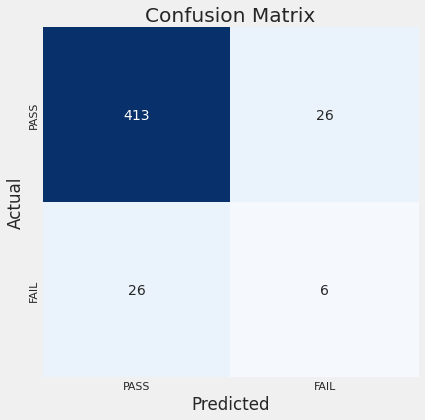

Classification Report:
----------------------
               precision    recall  f1-score   support

          -1       0.94      0.94      0.94       439
           1       0.19      0.19      0.19        32

    accuracy                           0.89       471
   macro avg       0.56      0.56      0.56       471
weighted avg       0.89      0.89      0.89       471



In [163]:
model = LogisticRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_test, y_test)

In [166]:
oversampler = RandomOverSampler(random_state=1)
X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)

In [170]:
y_train_os.value_counts()

 1    1024
-1    1024
Name: Pass/Fail, dtype: int64

In [169]:
fig = px.pie(
    y_train_os.value_counts(),
    values='Pass/Fail',
    names=["PASS", "FAIL"],
    title="Class Distribution",
    width=500
)

fig.show()

Accuracy: 86.41%


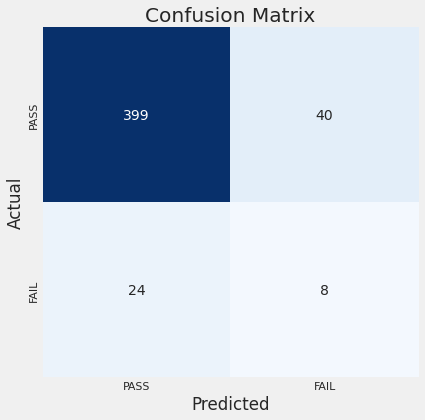

Classification Report:
----------------------
               precision    recall  f1-score   support

          -1       0.94      0.91      0.93       439
           1       0.17      0.25      0.20        32

    accuracy                           0.86       471
   macro avg       0.55      0.58      0.56       471
weighted avg       0.89      0.86      0.88       471



In [171]:
model = LogisticRegression()
model.fit(X_train_os, y_train_os)

evaluate_model(model, X_test, y_test)

In [172]:
oversampler = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

In [173]:
y_train_smote.value_counts()

 1    1024
-1    1024
Name: Pass/Fail, dtype: int64

Accuracy: 85.99%


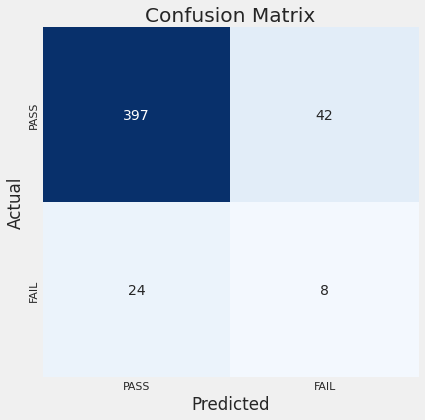

Classification Report:
----------------------
               precision    recall  f1-score   support

          -1       0.94      0.90      0.92       439
           1       0.16      0.25      0.20        32

    accuracy                           0.86       471
   macro avg       0.55      0.58      0.56       471
weighted avg       0.89      0.86      0.87       471



In [174]:
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

evaluate_model(model, X_test, y_test)

In [ ]:
# x_resample, y_resample  = SMOTE(random_state=1).fit_sample(x, y.values.ravel())

# print(x_resample.shape)
# print(y_resample.shape)